In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

mat_data_set = [()]
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device2  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device3  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device4  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

#j=0 dev5
#j=1 dev2
#j=2 dev3
#j=3 dev4

ce_window_smooth = [None] * len(mat_data_set)

for j in range(len(mat_data_set)):
    measurement = mat_data_set[j]['measurement']
    transient = measurement['transient']
    
    total_time = 0
    new_time = 0
    original = 0 
    time = np.array([])
    ce_data_list = []
    
    for i in range(len(transient[0,0][0])):
        date_str = transient[0,0][0][i][0][0]
        time_str = date_str.split(' ')[1]
        hour, minute, second = map(int, time_str.split(':'))
        
        new_time = hour*3600 + minute*60 + second
        if i == 0:
            original = new_time
        total_time = new_time - original
    
        time = np.append(time, total_time)
        
        ce_data = transient[0,0][0][i][2][0][0][3][0]
        ce_data_list.append(ce_data)
    
    ce_data_array = np.array(ce_data_list) 
    
    ce_sampling_data = [()]
    for i in range(len(ce_data_array)):
        if time[i]>=2000 and np.min(ce_data_array[i])<=4.0:
            break
        ce_sampling_data = np.append(ce_sampling_data, np.average(ce_data_array[i]))
    
    def calculate_weighted_average(x, t, span=15):
        theta = 2 / (span + 1)
        numerator = 0
        denominator = 0
    
        for i in range(t + 1):
            weight = (1 - theta) ** (t - i)
            numerator += weight * x[i]
            denominator += weight
    
        yt = numerator / denominator
        return yt
    
    span = 15
    ce_window_smooth[j] = np.zeros(len(ce_sampling_data))
    for t in range(len(ce_sampling_data)):
        ce_window_smooth[j][t] = calculate_weighted_average(ce_sampling_data, t, span)

print("Done")

Done


In [2]:
for q in range(len(mat_data_set)):
    len_ori = len(ce_window_smooth[q])
    print(len_ori)

103
106
96
91


In [24]:
ce_window_smooth[1]

array([1.88826793, 1.94144401, 1.97261081, 1.99324698, 2.00529834,
       2.01264815, 2.01701914, 2.10088043, 2.1730744 , 2.23328006,
       2.35315988, 2.45081939, 2.53035817, 2.59588919, 2.71728593,
       2.82634482, 2.91751149, 2.99338017, 3.05629439, 3.11493369,
       3.16573696, 3.21214876, 3.25318159, 3.28917852, 3.37881175,
       3.45553618, 3.5200767 , 3.58038749, 3.63270453, 3.67971252,
       3.71707108, 3.75310571, 3.78225785, 3.81023349, 3.83279479,
       3.8544368 , 3.87221055, 3.88925403, 3.96213704, 4.02496262,
       4.07724072, 4.12461757, 4.17239331, 4.21451997, 4.25201789,
       4.28798335, 4.32106473, 4.35093781, 4.37490298, 4.39639561,
       4.41525978, 4.48998556, 4.55404998, 4.612536  , 4.66324456,
       4.7065477 , 4.74369759, 4.77481815, 4.80521059, 4.82559828,
       4.84685029, 4.87207506, 4.8815848 , 4.89960973, 4.91356327,
       4.92971711, 4.94303765, 4.95200675, 4.96545904, 4.97361203,
       4.98223622, 5.00047948, 5.00574301, 5.01166513, 5.01549

In [3]:
ce_window_smooth_new = [None]*len(mat_data_set)
for q in range(len(mat_data_set)):
    div = max(ce_window_smooth[q])
    ce_window_smooth_new[q] = ce_window_smooth[q]/div
    #print(len(output_array_new[q])-len(ce_window_smooth[q])

In [4]:
ce_window_smooth_new

[array([0.33721397, 0.34739708, 0.35353713, 0.35617045, 0.35863139,
        0.36111979, 0.36216469, 0.36291933, 0.37751984, 0.39014634,
        0.40068675, 0.40897279, 0.41521241, 0.42119579, 0.42601601,
        0.42966075, 0.43329848, 0.44752117, 0.46030571, 0.47154404,
        0.4812702 , 0.48956471, 0.49678455, 0.50286866, 0.50772501,
        0.51238963, 0.51614296, 0.51968015, 0.53363447, 0.54619614,
        0.55746221, 0.57727845, 0.59544905, 0.61125743, 0.62498982,
        0.63687933, 0.64774568, 0.65739255, 0.67651097, 0.69315875,
        0.70753396, 0.7199328 , 0.7303875 , 0.74047244, 0.74959043,
        0.75759237, 0.76459312, 0.77094234, 0.77622967, 0.78104168,
        0.78515726, 0.79900632, 0.8110497 , 0.82216915, 0.83170524,
        0.84105145, 0.84900579, 0.85648717, 0.86283745, 0.86818968,
        0.87356618, 0.87820569, 0.88228051, 0.88566112, 0.88865272,
        0.89123194, 0.89361211, 0.89594226, 0.8983227 , 0.91126954,
        0.92325137, 0.93263161, 0.94117347, 0.94

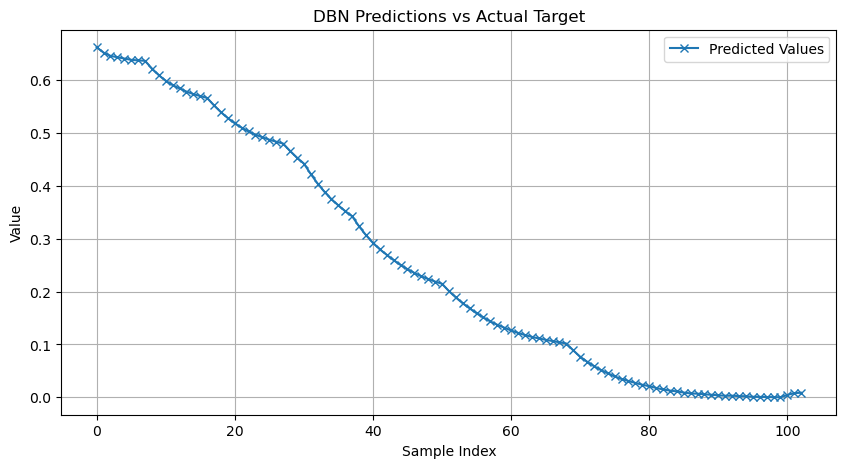

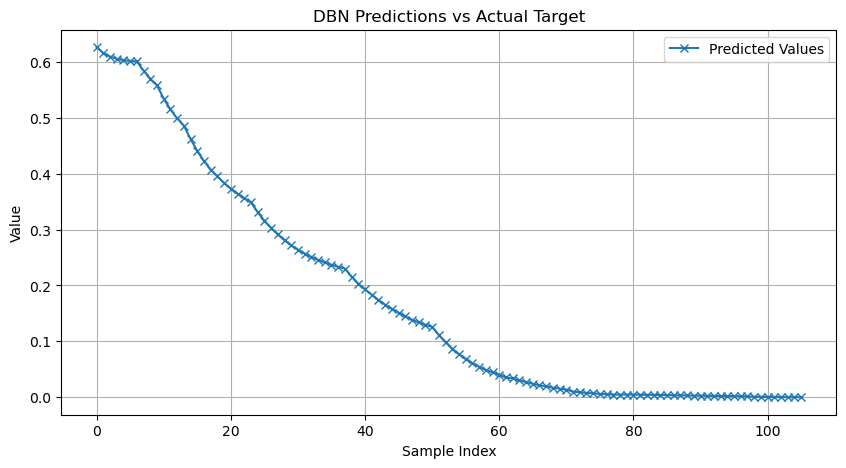

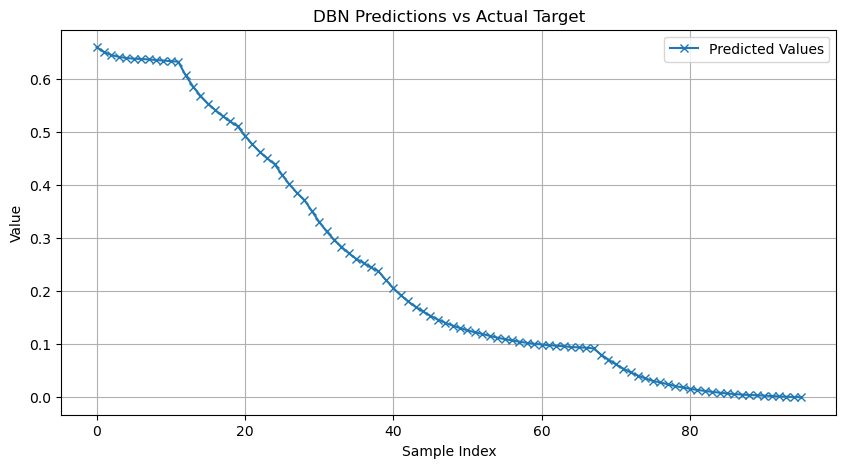

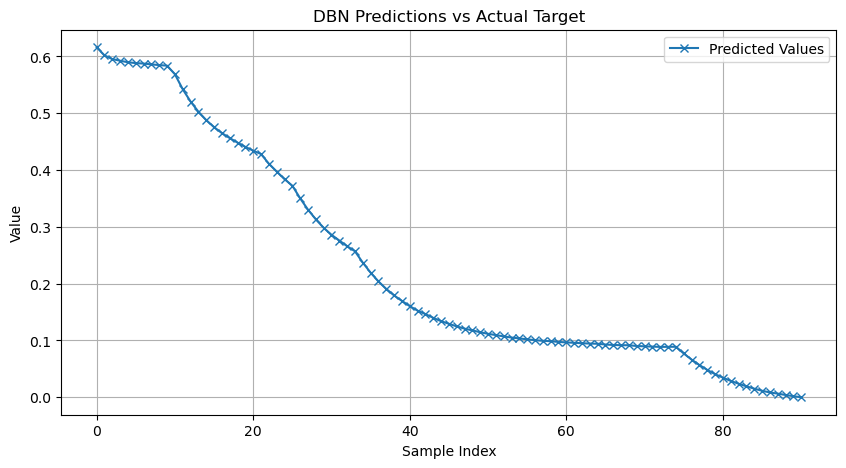

In [28]:
for q in range(len(mat_data_set)):
    plt.figure(figsize=(10, 5))
    plt.plot(ce_window_smooth_new[q], label="Predicted Values", marker="x")
    plt.title("DBN Predictions vs Actual Target")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
for q in range(len(mat_data_set)):
    ce_window_smooth_new[q] = 1-ce_window_smooth_new[q]

In [7]:
rul = [None] * len(mat_data_set)
for i in range(len(mat_data_set)):
    # Define the range of x
    x = np.linspace(0, len(ce_window_smooth[i]), len(ce_window_smooth[i]))

    # Calculate y values using the equation y = mx + c
    rul[i] = 1 - x/len(ce_window_smooth[i])

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic input and target arrays (replace with actual data)
input_array1 = ce_window_smooth_new[1]
input_array2 = ce_window_smooth_new[2]
input_array3 = ce_window_smooth_new[3]
input_array4 = ce_window_smooth_new[0]
target_array1 = rul[1]
target_array2 = rul[2]
target_array3 = rul[3]
target_array4 = rul[0]

# Convert each array to PyTorch tensors
input_tensor1 = torch.tensor(input_array1, dtype=torch.float32)
input_tensor2 = torch.tensor(input_array2, dtype=torch.float32)
input_tensor3 = torch.tensor(input_array3, dtype=torch.float32)
input_tensor4 = torch.tensor(input_array4, dtype=torch.float32)
target_tensor1 = torch.tensor(target_array1, dtype=torch.float32)
target_tensor2 = torch.tensor(target_array2, dtype=torch.float32)
target_tensor3 = torch.tensor(target_array3, dtype=torch.float32)
target_tensor4 = torch.tensor(target_array4, dtype=torch.float32)

# Define the RBM class
class RBM(nn.Module):
    def __init__(self, visible_units, hidden_units):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(hidden_units, visible_units) * 0.1)
        self.b_visible = nn.Parameter(torch.zeros(visible_units))
        self.b_hidden = nn.Parameter(torch.zeros(hidden_units))

    def forward(self, x):
        # Sample hidden units given visible units
        h_prob = torch.sigmoid(torch.matmul(x, self.W.t()) + self.b_hidden)
        h_sample = torch.bernoulli(h_prob)
        return h_sample

    def backward(self, h):
        # Reconstruct visible units given hidden units
        v_prob = torch.sigmoid(torch.matmul(h, self.W) + self.b_visible)
        v_sample = torch.bernoulli(v_prob)
        return v_sample

    def contrastive_divergence(self, x, k=1):
        # Contrastive divergence for training
        v = x
        for _ in range(k):
            h = self.forward(v)
            v = self.backward(h)

        h0 = torch.sigmoid(torch.matmul(x, self.W.t()) + self.b_hidden)
        hk = torch.sigmoid(torch.matmul(v, self.W.t()) + self.b_hidden)
        self.W.grad = torch.matmul(h0.t(), x) - torch.matmul(hk.t(), v)
        self.b_visible.grad = torch.sum(x - v, dim=0)
        self.b_hidden.grad = torch.sum(h0 - hk, dim=0)

# Define the DBN class
class DBN(nn.Module):
    def __init__(self, visible_units, hidden_units_list):
        super(DBN, self).__init__()
        self.rbms = nn.ModuleList()
        for i in range(len(hidden_units_list)):
            input_units = visible_units if i == 0 else hidden_units_list[i - 1]
            self.rbms.append(RBM(input_units, hidden_units_list[i]))
        self.regressor = nn.Linear(hidden_units_list[-1], 1)  # Regression layer

    def pretrain(self, x, k=1, epochs=10, lr=0.01):
        # Pretrain each RBM layer
        for rbm in self.rbms:
            optimizer = optim.SGD(rbm.parameters(), lr=lr)
            for epoch in range(epochs):
                rbm.zero_grad()
                rbm.contrastive_divergence(x, k)
                optimizer.step()
            # Update x to be the transformed output for the next RBM
            x = torch.sigmoid(torch.matmul(x, rbm.W.t()) + rbm.b_hidden)  # Hidden activations

    def forward(self, x):
        # Pass through pretrained RBMs
        for rbm in self.rbms:
            x = torch.sigmoid(torch.matmul(x, rbm.W.t()) + rbm.b_hidden)
        return self.regressor(x)

# Initialize the DBN
dbn = DBN(visible_units=1, hidden_units_list=[16, 8])

# Train the DBN with each array sequentially
optimizer = optim.Adam(dbn.parameters(), lr=0.01)
criterion = nn.MSELoss()
epochs = 100
# Function to train with a single array element by element
def train_with_array(array, target):
    for epoch in range(epochs):
        for i in range(len(array)):
            dbn.train()
            optimizer.zero_grad()
            x_input = array[i].view(1, -1)  # Single input element as batch
            y_target = target[i].view(1, -1)  # Corresponding target value
            y_pred = dbn(x_input)
            loss = criterion(y_pred, y_target)
            loss.backward()
            optimizer.step()
    print(f"Finished training with array. Last loss: {loss.item():.4f}")

# Train with each input array
train_with_array(input_tensor1, target_tensor1)
train_with_array(input_tensor2, target_tensor2)
train_with_array(input_tensor3, target_tensor3)
train_with_array(input_tensor4, target_tensor4)


Finished training with array. Last loss: 0.0000
Finished training with array. Last loss: 0.0000
Finished training with array. Last loss: 0.0002
Finished training with array. Last loss: 0.0001


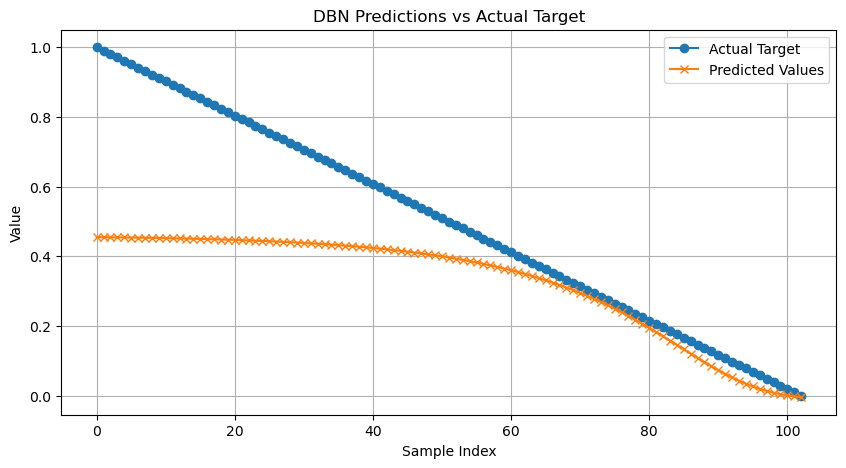

In [25]:
# Test the model on the target array
dbn.eval()
with torch.no_grad():
    predictions = []
    for i in range(len(target_tensor4)):
        predictions.append(dbn(target_tensor4[i].view(-1, 1)).item())

# Plot predictions vs actual target
plt.figure(figsize=(10, 5))
plt.plot(target_array4, label="Actual Target", marker="o")
plt.plot(predictions, label="Predicted Values", marker="x")
plt.title("DBN Predictions vs Actual Target")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


In [26]:
predictions_new = target_array4 - predictions

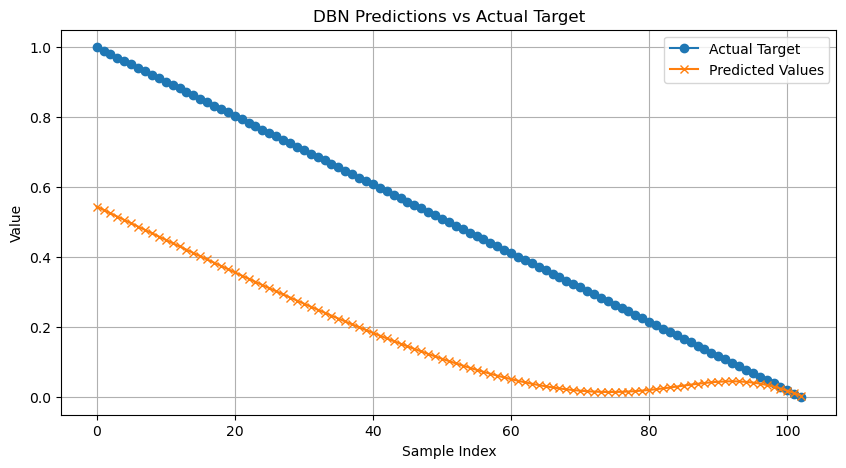

In [27]:
# Test the model on the target array
dbn.eval()
with torch.no_grad():
    predictions = []
    for i in range(len(target_tensor4)):
        predictions.append(dbn(target_tensor4[i].view(-1, 1)).item())

# Plot predictions vs actual target
plt.figure(figsize=(10, 5))
plt.plot(target_array4, label="Actual Target", marker="o")
plt.plot(predictions_new, label="Predicted Values", marker="x")
plt.title("DBN Predictions vs Actual Target")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()
